In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import multivariate_normal
from sklearn.mixture import gaussian_mixture
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.mixture.gaussian_mixture module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.mixture. Anything that cannot be imported from sklearn.mixture is now part of the private API.
  warnings.warn(message, FutureWarning)


Import Esential neeed function and library

In [ ]:
X = pd.read_csv('UAS_ML2021_DATASET02.csv')
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Membacata dataset dan mengubah dataset menjadi skalar

In [ ]:
score = 0
kloc = 0
for i in range (2,10):

  ModelMean = KMeans(n_clusters= i)
  model = ModelMean.fit(X)
  modelLabel = model.labels_
  SilhouetteScore = silhouette_score(X,modelLabel)

  if score< SilhouetteScore:
      score = SilhouetteScore
      kloc = i

In [ ]:
print("Score of Silhouette =",score)
print("Location of K = ",kloc)

Score of Silhouette = 0.7356847709879415
Location of K =  3


Code diatas digunakan untuk mencari soluhuete score dan mencari lokasi dari k untuk digunakan sebagai cluster terbaik
(POINT1)

In [ ]:
Model= KMeans(n_clusters= 3).fit(X)
MeanCentre = Model.cluster_centers_
print(MeanCentre)

[[ 0.12696481  0.02289726]
 [-1.47732521 -1.40637377]
 [ 1.197698    1.32922733]]


In [ ]:
Mean = np.array([[-1.47732521,-1.40637377],[ 0.12696481, 0.02289726],[1.197698, 1.32922733]])
sigma = np.array([[[.675, .825], [.825, 1.3]],[[.675, .9], [.9, 1.3]], [[.675,.9], [.9, 1.3]]])
phi = np.array([2/7, 3/7, 2/7])
resp =np.zeros((500,3))
Likelihood =np.zeros((500,3))

Mencari meancentre agar bisa digunakan ke dalam array, disini saya menggunakan sigma random dan phi random,juga mengunakan resp dengan 500,3 dan likelihood 500,3

In [ ]:
for j in range(0,100):
    for i in range(3):
      Likelihood[:,i] = multivariate_normal.pdf(X, Mean[i],sigma[i], allow_singular=True)
      resp[:,i] = phi[i] * Likelihood[:,i]

    log_likelihood = np.mean(np.log(np.sum(resp , axis =1)))
    resp = resp /resp.sum(axis = 1,keepdims = 1)
    for i in range (3):
      weight = resp[:, [i]]
      totalWeight = weight.sum()
      Mean[i] = (X * weight).sum(axis=0) / totalWeight 
      sigma[i] = np.cov(X.T, aweights=(weight/totalWeight).flatten(), bias=True)
    phi = resp.mean(axis=0)
    print(f'Epoch{j}:{log_likelihood}')

Epoch0:-1.901196498846346
Epoch1:-1.3073912770397351
Epoch2:-1.249984094907397
Epoch3:-1.2194525666412066
Epoch4:-1.1860926152730982
Epoch5:-1.1194597853665968
Epoch6:-1.033144716956885
Epoch7:-0.9692255660594001
Epoch8:-0.9196183991120022
Epoch9:-0.9056616516848608
Epoch10:-0.8931962245684977
Epoch11:-0.8730899527871041
Epoch12:-0.8400443863042777
Epoch13:-0.8004797362531793
Epoch14:-0.7864124565993718
Epoch15:-0.7854369354126791
Epoch16:-0.7853650747469489
Epoch17:-0.7853592750979289
Epoch18:-0.785358807166803
Epoch19:-0.7853587694863631
Epoch20:-0.7853587664544522
Epoch21:-0.7853587662105515
Epoch22:-0.7853587661909333
Epoch23:-0.7853587661893549
Epoch24:-0.7853587661892281
Epoch25:-0.7853587661892184
Epoch26:-0.785358766189217
Epoch27:-0.7853587661892171
Epoch28:-0.7853587661892173
Epoch29:-0.7853587661892165
Epoch30:-0.7853587661892167
Epoch31:-0.7853587661892165
Epoch32:-0.7853587661892173
Epoch33:-0.7853587661892165
Epoch34:-0.7853587661892167
Epoch35:-0.7853587661892167
Epoch36

coding diatas memperlihatkan
Responsibility (resp) memperlihatkan the probabilitas setial item yang termasuk di dalam cluster 0 1 atau 2(3 cluster) 
,melakukan normalisai terhadap semua cluster,merekalkulasi means dan covariance dan melakukanrekalulasi  koeefisian dan phi
(POINT B)
Disini melakukan printing ecpoch untuk nantinya disamakan dengan log likelihood di bawah

In [ ]:
print ("Means :", Mean) 
print("Covariances :", sigma)
print("phi :",phi)

Means : [[-1.47731854 -1.40636764]
 [ 0.13682024  0.02927173]
 [ 1.20349865  1.34760085]]
Covariances : [[[0.04634793 0.03839655]
  [0.03839655 0.04463047]]

 [[0.1186252  0.02261994]
  [0.02261994 0.05547854]]

 [[0.04784261 0.03834003]
  [0.03834003 0.04848321]]]
phi : [0.25000072 0.49995615 0.25004313]


hasil update dari MEans covariance dan phi (POINT C)

In [ ]:
for i in range(3):
    Likelihood[:,i] = multivariate_normal.pdf(X, Mean[i],sigma[i], allow_singular=True)
    resp[:,i] = phi[i] * Likelihood[:,i]

log_likelihood = np.mean(np.log(np.sum(resp , axis =1)))
resp = resp /resp.sum(axis = 1,keepdims = 1)
print(log_likelihood)

-0.7853587661892174


Melakukan pengecekan value dari log likeliehood sesuai dengan epoch yang diatas, dan pada akhirnya mempunyai nilai yang sama(2 angka di akhir tidak termasuk),(POINT D)

**Library**

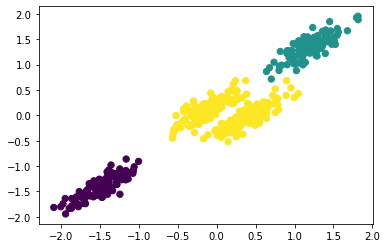

In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3).fit(X)
labels = gm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');


Disini melakukan ploting terhadap data yang sama di atas namun menggunakan library GMM

In [ ]:
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

Disini mempbuat ploting lingkaran/ellipse untuk menampilkanya lebih jelas lagi

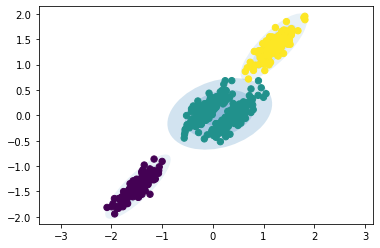

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=42)
plot_gmm(gmm, X)

Yang terakhir merupakan hasil ploting dan dikelompokan bedasarkan cluster, seperti di atas kita memiliki 3 cluster dan data plotin juga memperlihatkan adanya 3 cluster
(POINT E)